<a href="https://colab.research.google.com/github/dmousa75/stqd6014-Data-Science/blob/Project-2-Dr-Bernard/Corrections_Project2_DrBernard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <font color="yellow"> Introduction

The 2023 Rajya Sabha elections were held as part of a routine six-year cycle among certain of the State Legislatures in India on July and August 2023 to elect 10 of its 245 members, of which the states through their legislators elect 233, and the remaining 12 are appointed by the President.

# Step 1: Install Packages

In [2]:
# (Install Packages)

!pip install emoji # to work with emojis
!pip install nltk  # Determining the sentiment of texts
!pip install textblob # Text Processing, Tokenization, translation
!pip install wordcloud # visual representation for size of each words frequency & importance
!pip install plotly # for dynamic and visually stunning plots

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.2 MB/s eta 0:00:00


<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

In [3]:
# (Import NumPy, Pandas,Seaborn and matplotlib)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import emoji # to work with emojis
import re  # working with expressions, pattern in text
import nltk # Language processing
from nltk.tokenize import word_tokenize #break texts into individual words
from nltk.corpus import stopwords # filter out common words
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# Step 2: Load the dataset 'tweet.csv'
#link : https://www.kaggle.com/datasets/adritpal08/dataset-of-indian-politics-tweets-and-reactions

In [4]:
# (Load the dataset saved in drive)
# (Set the file path and read the file)
file_path = ('/content/drive/MyDrive/Colab Notebooks/Project 2/tweets.csv')
df = pd.read_csv(file_path)

<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

In [5]:
# (Inspect the data)
# (Show/Display the first few rows of DataFrame)
df.head()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
0,0,2023-03-29 15:42:36+00:00,AnandPatni8,@vinodkapri @RahulGandhi Respected Indian Citi...,0.0,0.0
1,1,2023-03-29 15:42:05+00:00,dhinamum,"*Respected Indian Citizens,* Namaskaar I Am Th...",0.0,0.0
2,2,2023-03-29 15:34:29+00:00,PrincetonCGI,1/n-Meet Filmmaker Prakash Jha in New Jersey t...,0.0,0.0
3,3,2023-03-29 15:31:43+00:00,RishiJoeSanu,@MrinalWahal Why would politicians stop using ...,0.0,0.0
4,4,2023-03-29 15:26:48+00:00,itweetsensee,@annamalai_k @narendramodi A state level presi...,0.0,0.0


<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

In [6]:
#(Inspect the data)
# (Show/Display the quick overview & summary of the data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50001 non-null  object 
 1   Date        50001 non-null  object 
 2   User        50001 non-null  object 
 3   Tweet       50000 non-null  object 
 4   Likes       49999 non-null  float64
 5   Retweets    49999 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.3+ MB


## <font color="yellow"> Summary:
1. It has 50,000 of observations , comments and users.
2. Give the types of values in  the columns for next analysis.

<font color='red'>**Comments:**

<font color='red'>**1. Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

<font color='red'>**2. Based on the output above, do the data types meet your expectations? Please provide an explanation to help guide the readers.**

# Step 3: Wrangling the Data

## Check All unique users from dataset

In [7]:
# (Select the 'User' column)
# ('nunique()': function counts the number of unique(distinc) values)

all_unique_users_count = df['User'].nunique()
print("Number of unique users:", all_unique_users_count)

Number of unique users: 35110


<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

## Sampled the data to 40% of rows randomly

In [8]:
#(get 40% of the data)
sampled_df = df.sample(frac=0.40, random_state=42)

### <font color="yellow">Notes
1. df.sample(): is method to generate a random sample of rows fro the 'df'.
2. frac=0.40 : specifies 40% of the rows randomly selected.
3. random_state=42 : to ensure reproducibility, (42) will give same random sample every time we run the code.

<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**1. What's the purpose running the above code**

<font color='red'>**2. What is your justification for sampling 40% of the rows? What is the purpose of this sampling?**

In [9]:
#(Inspect the sample data)
#(Brief summary of the sample data)
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 33553 to 42327
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20000 non-null  object 
 1   Date        20000 non-null  object 
 2   User        20000 non-null  object 
 3   Tweet       20000 non-null  object 
 4   Likes       19999 non-null  float64
 5   Retweets    19999 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.1+ MB


### <font color="yellow">Notes:
1. <font color="yellow">Its shows that 20,000 from  all the data was selected, 40% out of 50,000 observations.

2. <font color="yellow">For the 40% selected randomly, it is sufficient as a sample because most analyses typically use 30%. For the calculations of the total parties contesting in the elections, the 40% randomly selected sentiment will provide a good analysis, as a larger sample generally leads to better results.

<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**1. What's the purpose running the above code**

<font color='red'>**2. Based on the output above, do the data types now already meet your expectations? Please provide an explanation to help guide the readers.**

In [10]:
#I(nspect the sampled data)
#(Show the first few rows from the data)
sampled_df.head()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
33553,33552,2022-12-02 10:51:11+00:00,fekubawa,@desimojito Yeah and since 2014 Modi has pulle...,1.0,0.0
9427,9427,2023-03-07 04:05:38+00:00,IRASP_UWA,Felix Pal is a #qualitative #PoliticalScientis...,1.0,1.0
199,199,2023-03-29 09:36:41+00:00,WhybotherMeh,@ShefVaidya @RahulGandhi Never seen any other ...,0.0,0.0
12447,12447,2023-02-25 10:38:25+00:00,albert_colaco,@amitmalviya Your leadership is lying every da...,0.0,0.0
39489,39488,2022-11-11 11:20:19+00:00,adwitiya_singh,@Politics_2022_ @mayank_sxn That's the same th...,0.0,0.0


<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

In [11]:
#(Show the last few rows of the sampled data)
sampled_df.tail()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
14324,14324,2023-02-18 18:17:55+00:00,MotheVarun,@FemboyBebop @ViceApologist there is no indian...,0.0,0.0
43454,43453,2022-10-30 05:21:53+00:00,BhaiTej,@kanhaiyakumar The one who has no commonsense ...,0.0,0.0
29499,29498,2022-12-15 11:16:01+00:00,ModernWorldCen,#PoliticsToday #politics #elections Past prese...,0.0,0.0
42682,42681,2022-11-01 07:49:33+00:00,hlast2704,@MumbaichaDon U and anshul saxena are so intel...,1.0,0.0
42327,42326,2022-11-02 15:32:45+00:00,aniketn62648454,@chandnii__ Meaning of Secularism :- separatio...,0.0,0.0


<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

## Count how much user tweets in 'sampled_df'

In [12]:
#Count the users in new sampled DataFrame
unique_users_count = sampled_df['User'].nunique()
print("Number of unique users:", unique_users_count)

Number of unique users: 16166


### <font color="yellow">Notes:
1. Its show 16,166 users selected. All sentiments from this users will be anaylised.

<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

##Interval the dates

In [13]:
#(Create new column in sampled data and range of date)
sampled_df['Date'] = pd.date_range(start='2022-01-01',end='2023-12-31' ,periods=len(sampled_df))


### <font color="yellow">Notes:
1. Create new column in sampled dataset and give the range of date.
2. The range is for analysis for period of time all the sentiments included.
3. Its before the date of Elections pronounced.

<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

In [14]:
#(Sort datetimes in sampled DataFrame)
sampled_df = sampled_df.sort_values(by='Date')


In [15]:
#(Inspect the sampled DataFrame)
#(Get the first top rows, make sure the column 'Date' is added)
sampled_df.head()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
33553,33552,2022-01-01 00:00:00.000000000,fekubawa,@desimojito Yeah and since 2014 Modi has pulle...,1.0,0.0
9427,9427,2022-01-01 00:52:29.437471873,IRASP_UWA,Felix Pal is a #qualitative #PoliticalScientis...,1.0,1.0
199,199,2022-01-01 01:44:58.874943747,WhybotherMeh,@ShefVaidya @RahulGandhi Never seen any other ...,0.0,0.0
12447,12447,2022-01-01 02:37:28.312415620,albert_colaco,@amitmalviya Your leadership is lying every da...,0.0,0.0
39489,39488,2022-01-01 03:29:57.749887494,adwitiya_singh,@Politics_2022_ @mayank_sxn That's the same th...,0.0,0.0


<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

In [16]:
#(Inspect the last few rows of sampled DataFrame)
#(Check the 'Date' column, last date sorted)
sampled_df.tail()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets
14324,14324,2023-12-30 20:30:02.250112504,MotheVarun,@FemboyBebop @ViceApologist there is no indian...,0.0,0.0
43454,43453,2023-12-30 21:22:31.687584384,BhaiTej,@kanhaiyakumar The one who has no commonsense ...,0.0,0.0
29499,29498,2023-12-30 22:15:01.125056256,ModernWorldCen,#PoliticsToday #politics #elections Past prese...,0.0,0.0
42682,42681,2023-12-30 23:07:30.562528128,hlast2704,@MumbaichaDon U and anshul saxena are so intel...,1.0,0.0
42327,42326,2023-12-31 00:00:00.000000000,aniketn62648454,@chandnii__ Meaning of Secularism :- separatio...,0.0,0.0


### <font color="yellow">Notes:
1. Its to check the few rows from the top and last of the 'sampled_df'.
2. Also to check the range of the date from the previous cell is sorted properly.

<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

In [17]:
#(Create new column 'Interval')
#(Calculate intervals and make bins( calculate time difference between days)
sampled_df['Interval'] = sampled_df['Date'].diff()

In [18]:
#(Adding descriptive labels to time interval)
labels = ['1 day', '2 days', '3 days']
sampled_df

,Unnamed: 0,Date,User,Tweet,Likes,Retweets,Interval
33553,33552,2022-01-01 00:00:00.000000000,fekubawa,@desimojito Yeah and since 2014 Modi has pulle...,1.0,0.0,NaT
9427,9427,2022-01-01 00:52:29.437471873,IRASP_UWA,Felix Pal is a #qualitative #PoliticalScientis...,1.0,1.0,0 days 00:52:29.437471873
199,199,2022-01-01 01:44:58.874943747,WhybotherMeh,@ShefVaidya @RahulGandhi Never seen any other ...,0.0,0.0,0 days 00:52:29.437471874
12447,12447,2022-01-01 02:37:28.312415620,albert_colaco,@amitmalviya Your leadership is lying every da...,0.0,0.0,0 days 00:52:29.437471873
39489,39488,2022-01-01 03:29:57.749887494,adwitiya_singh,@Politics_2022_ @mayank_sxn That's the same th...,0.0,0.0,0 days 00:52:29.437471874
...,...,...,...,...,...,...,...
14324,14324,2023-12-30 20:30:02.250112504,MotheVarun,@FemboyBebop @ViceApologist there is no indian...,0.0,0.0,0 days 00:52:29.437471872
43454,43453,2023-12-30 21:22:31.687584384,BhaiTej,@kanhaiyakumar The one who has no commonsense ...,0.0,0.0,0 days 00:52:29.437471880
29499,29498,2023-12-30 22:15:01.125056256,ModernWorldCen,#PoliticsToday #politics #elections Past prese...,0.0,0.0,0 days 00:52:29.437471872
42682,42681,2023-12-30 23:07:30.562528128,hlast2704,@MumbaichaDon U and anshul saxena are so intel...,1.0,0.0,0 days 00:52:29.437471872


<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

In [19]:
#(Create new column and give bins of time range day 1 to day 2)

sampled_df['bin'] = pd.cut(sampled_df['Interval'], bins=[pd.Timedelta(days=0), pd.Timedelta(days=1), pd.Timedelta(days=2), pd.Timedelta(days=3)], labels=labels)

<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

In [20]:
#(Show the dataset)
print(sampled_df)

      Unnamed: 0                          Date             User  \
33553      33552 2022-01-01 00:00:00.000000000         fekubawa   
9427        9427 2022-01-01 00:52:29.437471873        IRASP_UWA   
199          199 2022-01-01 01:44:58.874943747     WhybotherMeh   
12447      12447 2022-01-01 02:37:28.312415620    albert_colaco   
39489      39488 2022-01-01 03:29:57.749887494   adwitiya_singh   
...          ...                           ...              ...   
14324      14324 2023-12-30 20:30:02.250112504       MotheVarun   
43454      43453 2023-12-30 21:22:31.687584384          BhaiTej   
29499      29498 2023-12-30 22:15:01.125056256   ModernWorldCen   
42682      42681 2023-12-30 23:07:30.562528128        hlast2704   
42327      42326 2023-12-31 00:00:00.000000000  aniketn62648454   

                                                   Tweet  Likes  Retweets  \
33553  @desimojito Yeah and since 2014 Modi has pulle...    1.0       0.0   
9427   Felix Pal is a #qualitative #Polit

<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

In [21]:
#(Sum of interval within each bin)
bin_sums = sampled_df.groupby('bin')['Interval'].sum().reset_index()
print(bin_sums)

      bin Interval
0   1 day 729 days
1  2 days   0 days
2  3 days   0 days


<ipython-input-21-b310953a7252>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_sums = sampled_df.groupby('bin')['Interval'].sum().reset_index()


### <font color="yellow">Notes:
1. Total comments are filtered and showed taht it was a daily comments from all the users in sampled_df.
2. The purpose is to know are the comments from the users are collected from every single day or in range of 2 to 3 days.
3. Analysis is to know what are sentiments for every day.

In [22]:
#(Check all the columns created)
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 33553 to 42327
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Unnamed: 0  20000 non-null  object         
 1   Date        20000 non-null  datetime64[ns] 
 2   User        20000 non-null  object         
 3   Tweet       20000 non-null  object         
 4   Likes       19999 non-null  float64        
 5   Retweets    19999 non-null  float64        
 6   Interval    19999 non-null  timedelta64[ns]
 7   bin         19999 non-null  category       
dtypes: category(1), datetime64[ns](1), float64(2), object(3), timedelta64[ns](1)
memory usage: 1.7+ MB


### <font color="yellow"> Notes:
1. The summary shows that all the bins for interval of times created are distributed fairly for the 40% of the data selected.

<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**1. What's the purpose running the above code**

<font color='red'>**2. Based on the output above, do the data types now already meet your expectations? Please provide an explanation to help guide the readers.**

In [23]:
#(Count the number of unique users for each day)
user_counts = sampled_df.groupby('Date')['User'].nunique().reset_index()
print(user_counts)

                               Date  User
0     2022-01-01 00:00:00.000000000     1
1     2022-01-01 00:52:29.437471873     1
2     2022-01-01 01:44:58.874943747     1
3     2022-01-01 02:37:28.312415620     1
4     2022-01-01 03:29:57.749887494     1
...                             ...   ...
19995 2023-12-30 20:30:02.250112504     1
19996 2023-12-30 21:22:31.687584384     1
19997 2023-12-30 22:15:01.125056256     1
19998 2023-12-30 23:07:30.562528128     1
19999 2023-12-31 00:00:00.000000000     1

[20000 rows x 2 columns]


In [24]:
#(Check the summary of 'user_info')
#(Shows there is 20k entries and No missing values'NaN' for each column)
user_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20000 non-null  datetime64[ns]
 1   User    20000 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 312.6 KB


<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

In [25]:
#(Inspect the data for the first top rows)
user_counts.head()

,Date,User
0,2022-01-01 00:00:00.000000000,1
1,2022-01-01 00:52:29.437471873,1
2,2022-01-01 01:44:58.874943747,1
3,2022-01-01 02:37:28.312415620,1
4,2022-01-01 03:29:57.749887494,1


<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

In [26]:
#(Check the few last rows)
user_counts.tail()

,Date,User
19995,2023-12-30 20:30:02.250112504,1
19996,2023-12-30 21:22:31.687584384,1
19997,2023-12-30 22:15:01.125056256,1
19998,2023-12-30 23:07:30.562528128,1
19999,2023-12-31 00:00:00.000000000,1


<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

# Step 4: Pre-processed the sampled data

###Check for the'NaN' values.

In [27]:
#(check for NaN values)
nan_counts = sampled_df.isna().sum()
print(nan_counts)

Unnamed: 0    0
Date          0
User          0
Tweet         0
Likes         1
Retweets      1
Interval      1
bin           1
dtype: int64


###Make a 'function' to reprocess the text.

In [28]:
#function to reprocess text
def preprocess_text(text):
  #convert emojis to text
  text = emoji.demojize(text)
  #remove special characters
  text = re.sub(r'[^\w\s]', '', text)
  #Tokenize text
  tokens = word_tokenize(text)
  #Remove stopwords
  token = [word for word in tokens if word.lower() not in stopwords.words('english')]
  return tokens

###Apply preprocessing function to "Tweet' Column

In [29]:
#(Apply preprocessing to the 'Tweet' column)
sampled_df['tokens'] = sampled_df['Tweet'].apply(preprocess_text)

# Step 5: Perform Sentiment Analysis

###Check the 'Tokes' words

In [30]:
#(Check the tokenize words created)
print(sampled_df['tokens'])

33553    [desimojito, Yeah, and, since, 2014, Modi, has...
9427     [Felix, Pal, is, a, qualitative, PoliticalScie...
199      [ShefVaidya, RahulGandhi, Never, seen, any, ot...
12447    [amitmalviya, Your, leadership, is, lying, eve...
39489    [Politics_2022_, mayank_sxn, Thats, the, same,...
                               ...                        
14324    [FemboyBebop, ViceApologist, there, is, no, in...
43454    [kanhaiyakumar, The, one, who, has, no, common...
29499    [PoliticsToday, politics, elections, Past, pre...
42682    [MumbaichaDon, U, and, anshul, saxena, are, so...
42327    [chandnii__, Meaning, of, Secularism, separati...
Name: tokens, Length: 20000, dtype: object


<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**- What's the purpose running the above code**

###Using 'TextBlob' module to perform Sentiment Analysis

In [31]:
#(use TextBlob to perform sentiment analysis on the preprocessed twets)
from textblob import TextBlob

def get_sentiment(tokens):
  sentiment = TextBlob(' '.join(tokens)).sentiment.polarity
  if sentiment > 0:
    return 'Positive'
  elif sentiment < 0:
    return 'Negative'
  else:
    return 'Neutral'


###Apply the 'get_sentiment' function and add as a column in sampled data

In [32]:
#(Apply the get_sentiment function to the 'tokens' column and store the results in a new column 'sentiment)
sampled_df['sentiment'] = sampled_df['tokens'].apply(get_sentiment)


###Check the 'get_sentiment' column

In [33]:
#(check column 'sentiment' added to dataframe)
sampled_df.head()

,Unnamed: 0,Date,User,Tweet,Likes,Retweets,Interval,bin,tokens,sentiment
33553,33552,2022-01-01 00:00:00.000000000,fekubawa,@desimojito Yeah and since 2014 Modi has pulle...,1.0,0.0,NaT,NaN,"[desimojito, Yeah, and, since, 2014, Modi, has...",Negative
9427,9427,2022-01-01 00:52:29.437471873,IRASP_UWA,Felix Pal is a #qualitative #PoliticalScientis...,1.0,1.0,0 days 00:52:29.437471873,1 day,"[Felix, Pal, is, a, qualitative, PoliticalScie...",Positive
199,199,2022-01-01 01:44:58.874943747,WhybotherMeh,@ShefVaidya @RahulGandhi Never seen any other ...,0.0,0.0,0 days 00:52:29.437471874,1 day,"[ShefVaidya, RahulGandhi, Never, seen, any, ot...",Negative
12447,12447,2022-01-01 02:37:28.312415620,albert_colaco,@amitmalviya Your leadership is lying every da...,0.0,0.0,0 days 00:52:29.437471873,1 day,"[amitmalviya, Your, leadership, is, lying, eve...",Positive
39489,39488,2022-01-01 03:29:57.749887494,adwitiya_singh,@Politics_2022_ @mayank_sxn That's the same th...,0.0,0.0,0 days 00:52:29.437471874,1 day,"[Politics_2022_, mayank_sxn, Thats, the, same,...",Neutral


#Step 6: Visualize the data

### i) Bar Plot of Sentiments vs Likes

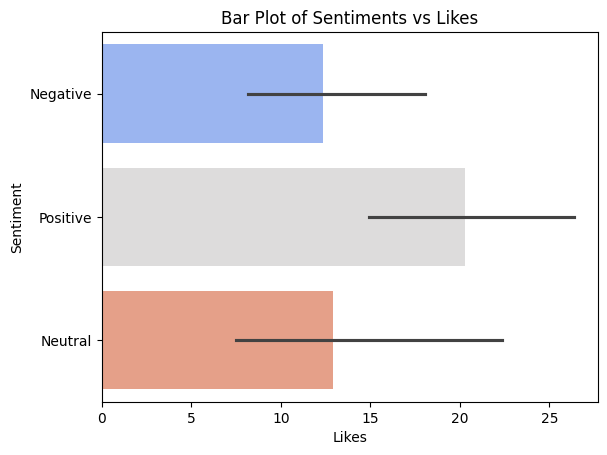

In [34]:
#(barplot graph)
sns.barplot(data=sampled_df, x='Likes', y='sentiment', hue='sentiment', palette='coolwarm')
plt.title('Bar Plot of Sentiments vs Likes')
plt.xlabel('Likes')
plt.ylabel('Sentiment')
plt.show()

<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**1. What's the purpose running the above code**

<font color='red'>**2. Scatter plot is not suitable in this case; a bar plot would be more appropriate.**

### <font color='yellow'>The Bar Plot graph shown that Positives sentiments got more likes than Negatives and users become Neutral and not taken side for any comments and support any local parties.

### ii) Bar plot of Sentiments vs Retweets

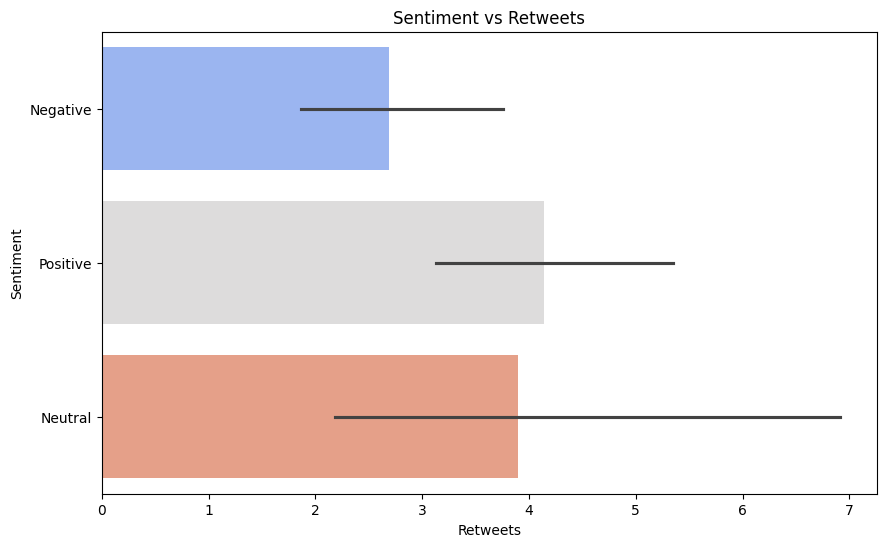

In [35]:
# (Bar plot of Sentiment vs Retweets)
plt.figure(figsize=(10, 6))
sns.barplot(data=sampled_df, x='Retweets', y='sentiment', hue='sentiment', palette='coolwarm')
plt.title('Sentiment vs Retweets')
plt.xlabel('Retweets')
plt.ylabel('Sentiment')
plt.show()


### 1. <font color='yellow'>The Bar Plot  shown that peoples is more positives to retweet the statements when it is a positives compared to the negative's and the neutral staements.

### 2. Its also shown that negative and neutral statements achieved significant retweet numbers, could be others factors beyond sentiments can influence retweeting behavior.

<font color='red'>**Comments:**

<font color='red'>**1. Scatter plot is not suitable in this case; a bar plot would be more appropriate.**

##iii- Histogram of Sentiments Scores

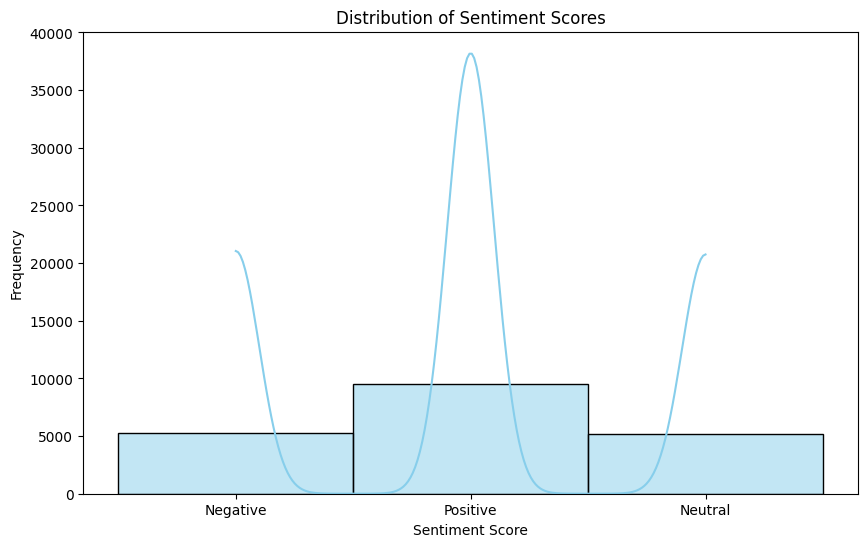

In [36]:
# (Histogram of Sentiment Scores)
plt.figure(figsize=(10, 6))
sns.histplot(data=sampled_df, x='sentiment', kde=True, bins=30, color='skyblue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

## The Histogram :    
*   x-axis: Sentiment Scores(Polarity)
*   y-axis : Frequency/Count
*   Bars : Represent a range of sentiment scores(a bin)

1. The overall sentiments is positives, with more tweets  expressing positive sentiment than negative or neutral sentiment.

2. It Also shown that the relationships between sentiment and other factors like retweet and likes.

3. <font color='yellow'>The smooth line overlaid gives a smoothes, continuos representation of the distribution.

4. <font color='yellow'>peak in the curve indicate whee the data points are most concentrated.

5. <font color='yellow'>Check which sentiment category has the highest bar (frequency) or density.

<font color='red'>**Comments:**

<font color='red'>**1. What is the purpose of including the density lines in the histogram?**



##iv- Wordcloud

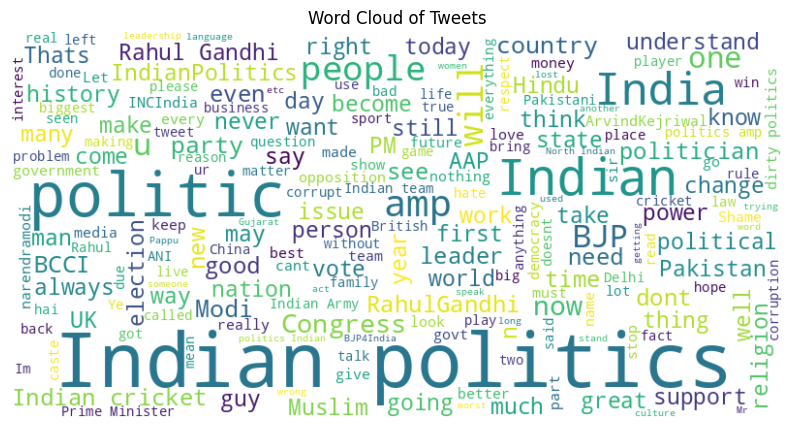

In [37]:
#(Setting the wordcloud graph)
from wordcloud import WordCloud
# Combine all processed tweets into a single string
#Instead of using 'processed_tweet', use 'tokens' column which contains the processed tweets
all_words = ' '.join([' '.join(tweet) for tweet in sampled_df['tokens']])
# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()

### Notes :
1. The Wordcloud suggest the most frequently wors within the collected tweets. The size or sords indicating higher frequency of occurence in text data.

2. The others things to understand are :
  - Political Context : specific political landscape from various backgrounds of users and connotations of words within that context.

  - Frequency and Size : a larger words indicates higher fequency and therefore, the greater importance in the discussoons.

  - Words Associations : there will any clusters or grouping of words , as much as 'pattern' that moght suggest connections between different concepts or themes.

3. The word cloud highlights prominent terms such as "Indian," "politics," and "BJP," alongside smaller terms like "religion," "Congress," "Modi," "Hindu," and "Prime Minister."

4. From this, we can infer that the main topics of discussion on Twitter regarding Indian politics - during that particular time- in the upcoming elections revolve around the BJP, the ruling party, and the Congress party.

5. Additionally, the discussions encompass issues related to religion, change, support, the Prime Minister, business, Hindu and Muslim communities, among others. This indicates that these issues are considered significant in India. Any party that can address and provide solutions for these discussed issues is likely to gain support in the upcoming election.

6. <font color="yellow">It clearly shows a positive outcome when the BJP party regained more state seats in Chhattisgarh and Rajasthan. Undoubtedly, actions based on sentiment analysis before the election days contributed to making the BJP party more favorable among voters as shown on Wordcloud graph.



###The <font color='red'>**results of the elections in the nine states align with the sentiment analysis derived from Twitter data weeks and months before the election campaigns. The BJP regained two more states in the election**</font>, reflecting the public's support for the ruling party and their positive sentiment towards Prime Minister Modi.

<font color='red'>**Comments:**

<font color='red'>**1. Could you provide published reports that corroborate your claims (highlighted red) here?**







<font color="yellow"> Notes:
Summary report for the result of India Election in 2023 for State Legislative Assembly Election.

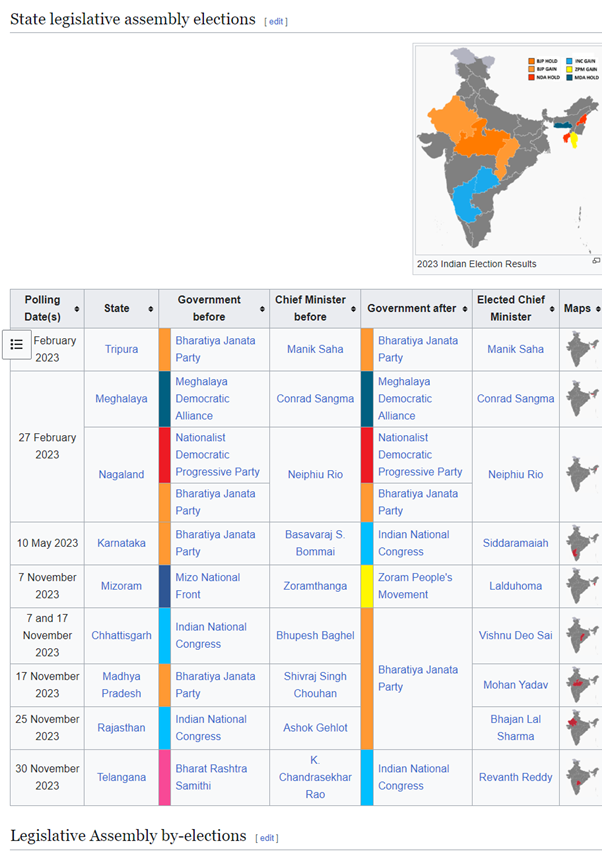

### Notes :    
1. <font color='yellow'>From the image above ( https://en.wikipedia.org/wiki/2023_elections_in_India) shows that :
  a- State of **Chhattisgarh** and **Rajasthan**  were under INC Party then BJP gained that 2 constituencies during that election.

##v- Pairplot

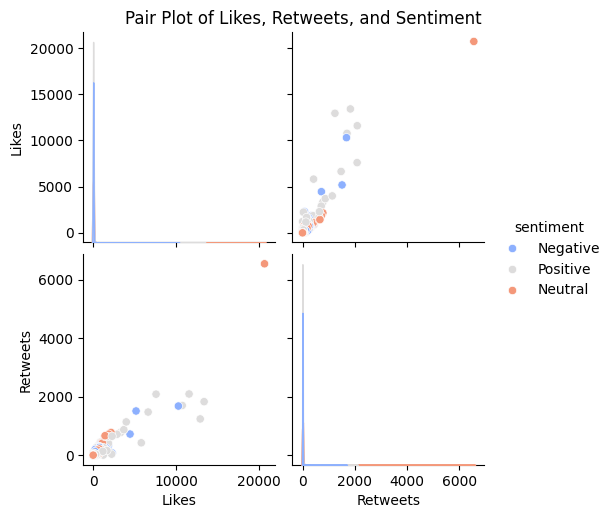

In [38]:
# (Pair plot to visualize relationships between variables)
sns.pairplot(sampled_df[['Likes', 'Retweets', 'sentiment']], hue='sentiment', palette='coolwarm')
plt.suptitle('Pair Plot of Likes, Retweets, and Sentiment', y=1.02)
plt.show()


### The Pairplot Graph used to visualize and explore relationship between variables within dataset. We want to examine relationship between 'Likes', 'Retweets' and 'Sentiments' in the collected tweets.

### The graph shows that :     
 1. The Scatter Plots shows positive correlation between 'Likes' and 'Retweets' suggest that tweets with more likes tend to also have more retweets.

 2. There also <font color='red'>**have relationship**</font> between the popularity of a tweet (measured by likes and retweet) and the sentiment it express.

 3. <font color='yellow'>***Likes vs Retweets(Bottom-Lef Plot)*** : There are positive correlations between Likes and Retweets. As the number of Likes increases, the number of Retweets tends to increase as well.Populat posts (those with higher Likes) are more likely to e Retweeted.

 4. <font color='yellow'>***Likes vs Sentiments(Top-Left Plot)*** : There are no strong relationship between Like and Sentiments. The data points are scattered, with no obvious trend linking sentiment ( Negative, Neutral, Positive) to the number of likes.

 5. <font color='yellow'>***Retweets vs Sentiments(Bottom-Right Plot)*** : Similar to Likes vs Sentiment, there is no clear trend between Retweets and Sentiments. Data Points are distributed acrossthe plot, with some variability but no strong clustering for a specific sentiment category. Retweets may not heavily influenced by sentiment alone. other factors as the subject of the post, the author, or external events might plat significant role in driving Retweets. Issues like BJP, Hinduisme, PM Narenda Mordi etc, might give a substances role in Retweets.

 6. <font color="yellow">As shown in the pair plot graph, the correlations between Likes, Retweets, and Sentiment provide a broader perspective, enabling the creation and refinement of a positive narrative tailored specifically for social media campaigns during the elections.


<font color='red'>**Comments:**

<font color='red'>**1. When you mention 'have a relationship,' could you explain what kind of relationship you are referring to?**

<font color='red'>**2. Please provide a more detailed explanation to guide the readers on how to interpret your scatter plot.**


##vi- Pie Chart Distribution of Sentiments

In [39]:
#(get the counts of sentiments from the DataFrame)
sentiment_counts = sampled_df['sentiment'].value_counts()

<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**1. What's the purpose running the above code**

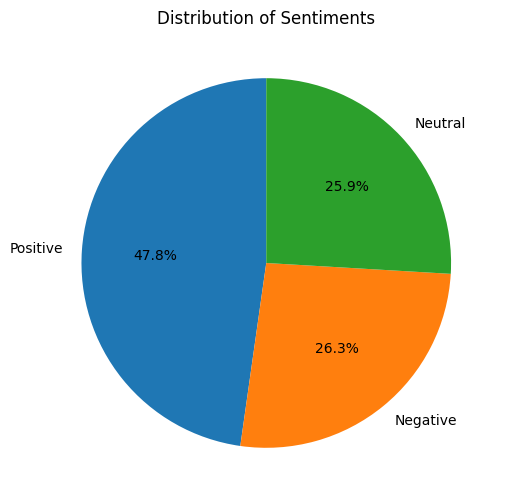

In [40]:
#(Pie Chart Counts/Percentage Distributions of Sentiments)
plt.figure(figsize=(8, 6))  # Set the figure size
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Sentiments')
plt.show()

<font color='red'>**Remember to add comments with hashtags (#) for the code above.**

<font color='red'>**1. What's the purpose running the above code**

### Notes:
1. The pie chart clearly illustrates the percentages distribution of sentiments from the analyzed data.

2. This serves as a valuable guide for politicians in India, highlighting the issues discussed on social media before the elections. By preparing solutions for the matters identified in the word cloud graph, politicians can address the concerns of the public effectively.

3. <font color='yellow'>Proportion: Almost half of the data analyzed(47.8%) is labeled positive. This significanr proportion indicates thaat he majority of responses or feedback reflect positively.

4. <font color='yellow'>Its show the overall perception of the subject being analyzed is favorable.

5. <font color='yellow'>Neutral Sentiments(25.9%) : quarter of data remains neutral, as reflects "No Strong Opinion" responses.

6. <font color='yellow'>Negative Sentiments(26.3%) : Slightly higher than neutral ones but lower than positive. This encouraging , as it implies fewer people are expressing dissatisfaction or disapproval. Its still need to be analyzed to identify pain points or area of improvement.

7. <font color='yellow'>The Strategy :   
  - <font color='yellow'>Maintain positive campaign;
  - <font color='yellow'>Identify factors that could convert the neutral audience to positive. For instance , more personalized engagement or adressing unmet needs;
  - <font color='yellow'>Address Negative Sentiment: Investigate the negative feedback futher to understand underlying issues and mitigate them. this help reducing dissatisfaction and creating better experiences overall.

<font color='red'>**Comments:**

<font color='red'>**1. Could you provide more insights from the pie chart above?**

<font color='red'>**2. What does the larger portion labeled "Positive" in the pie chart indicate?**

<font color='red'>**3. To strengthen your analysis, consider adding your personal insights. If possible, corroborate your observations with published reports that support your findings.**

##vii- Bar Chart

<ipython-input-41-440ae3101d58>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sampled_df, x='sentiment', palette='coolwarm')


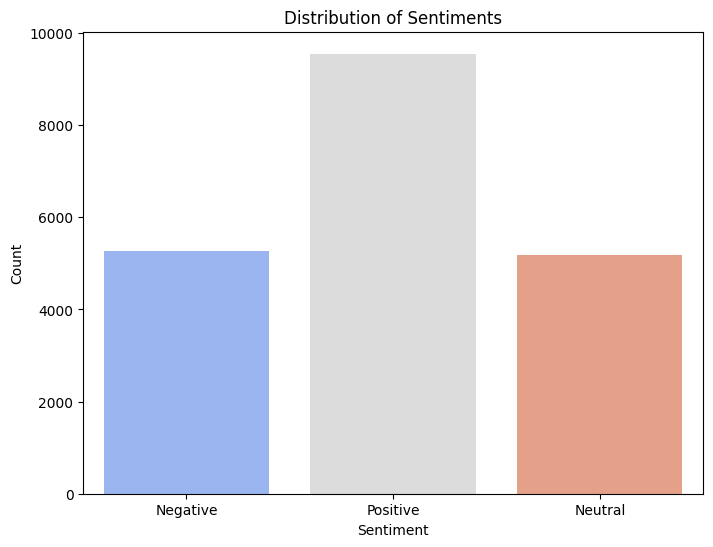

In [41]:
#(Bar Chart - get the sentiments counts)

sentiment_counts = sampled_df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sns.countplot(data=sampled_df, x='sentiment', palette='coolwarm')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
# # Define colors for each sentiment category
# colors = ['skyblue', 'lightcoral', 'lightgreen']
# plt.bar(sentiment_counts.index, sentiment_counts.values, color=colors)
# plt.title('Distribution of Sentiments')
# plt.xlabel('Sentiment')
# plt.ylabel('Number of Tweets')
# plt.show()

### Notes :
1. The bar chart visualizes and summarizes the count of tweets, categorically dividing them into sentiments: 'Negative,' 'Positive,' and 'Neutral.'

2. It shows that <font color='red'>**positive sentiment dominates the tweets**</font>, as evidenced by the higher number of 'Retweets' and 'Likes' compared to negative and neutral sentiments.

3. <font color='yellow'>Positive Sentiment as a Reflection of the Event/Context: The prevalence of positive sentiment could indicate a broader emotional tone tied to the process of campaiging before the elction begin. The targeted auduence or timing could be the external factors to reflect this sentiments;

4. <font color='yellow'>Engagement Dynamics of Positive Content: Positive tweets tend to get higher engagement(like,retweets,replies) compared to neutral or negative ones because people are more likely to interact with content that evokes joy or optimism. The algorithm also may prioritize positive tweets, causing them to appear more frequently and be overrepresented in the analysis;

5. <font color='yellow'>Real-World Implications of Positive Sentiment:The dominance of positive senttiment could inform real-world actions. Its reflect a favorable alignment with the audience's expectations oe belief. For instance, continuing similar messaging, oe leveraging tis goodwillto promote future initiatives.

<font color='red'>**Comments:**

<font color='red'>**1. The statement "positive sentiment dominates the tweets" is quite apparent from your analysis, and readers can easily draw this conclusion.**

<font color='red'>**2. However, what is the 'deeper meaning' behind the graph that readers might not easily derive? Provide some unique insights that only someone with your expertise can offer.**

#Step 7: Conclussions

1. The dataset comprises 50,000 rows of user comments, likes, and retweets about politics in India from 2022 until November 2023.

2. Examining the patterns and distributions displayed in the plot, we can gain insights into how sentiment, likes, and retweets are interconnected within the context of Indian politics tweets. <font color="yellow">As shown in the pair plot graph, the correlations between Likes, Retweets, and Sentiment provide a broader perspective, enabling the creation and refinement of a positive narrative tailored specifically for social media campaigns during the elections.

3. The analysis aims to determine if sentiments expressed on social media weeks or months before the campaign period affect election results.

4. The analysis also examines whether positive sentiments in the data increase the likelihood of winning the election.<font color='yellow'>It clearly shows a positive outcome when the BJP party regained more state seats in Chhattisgarh and Rajasthan. Undoubtedly, actions based on sentiment analysis before the election days contributed to making the BJP party more favorable among voters as shown on ***Wordcloud*** graph.

5. A sample of 40% of the recorded data was chosen, based on the assumption that in a three-cornered fight, the candidate securing 40% of the votes is most likely to win.

6. The analysis suggests that all political parties should recognize social media as a tool to measure voter support before and during the campaign period. <font color="yellow">As mentioned in the Bar Chart of Distribution of Sentiment, it is evident that the only way to secure a favorable public perception and sentiment is by converting neutral sentiments into positive ones, as negative sentiments occur with the same frequency as neutral sentiments.

7. It is crucial to address issues and negative remarks raised on social media before Election Day.

8. The analysis would be more comprehensive with additional data on user ages, locations, and gender. <font color="yellow">If we obtain data on locations and gender, it would enable more effective preparation and allow for actions to be better targeted toward specific populations and voter groups, ultimately increasing support.

<font color='red'>**Comments:**

<font color='red'>**1. I like your conclusions, as they reflect your personal thoughts.**

<font color='red'>**2. However, some of the explanations would be more effective if they were presented alongside the figures you’ve plotted, rather than being placed in the conclusion.**
